In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv('data.csv')
data.head()

,COURSE,GRADE,CREDITS
0,ESC111,A,6
1,ESC112,A,6
2,MTH111,C,7
3,TA111,B+,9
4,CHM113,D,4


In [12]:
# mapping between grades and points
map = {
    "A*":10,
    "A":10,
    "B+":9,
    "B":8,
    "C+":7,
    "C":6,
    "D+":5,
    "D":4,
    "E":0,
    "F":0
}
def grade_to_points(grade:str):
    if grade in map.keys():
        return map[grade]
    else:
        print("Invalid Grade!!!")

In [35]:
#Calculate CPI
##first we need to convert grades into points

new_data = data.copy()
new_data['GRADE'] = new_data['GRADE'].apply(grade_to_points)
new_data.head()

points = new_data['GRADE'].to_numpy()
credits = new_data['CREDITS'].to_numpy()
p_c = np.multiply(points,credits)
sigma_p_c = np.sum(p_c)
sigma_c = np.sum(credits)

cpi = sigma_p_c/sigma_c


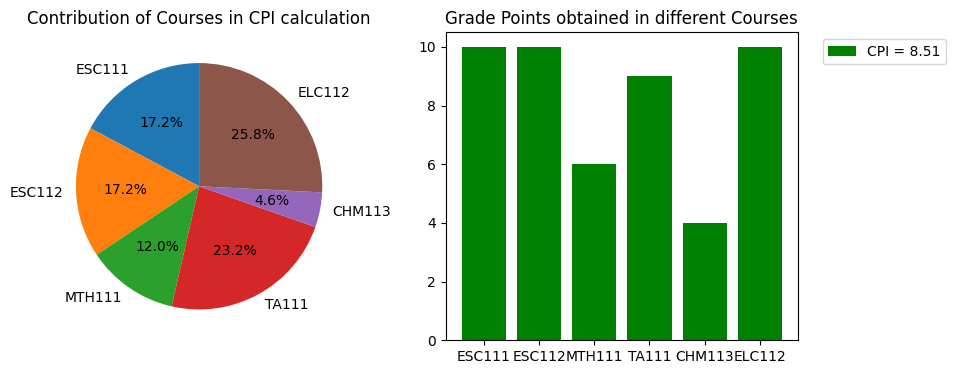

In [ ]:
##Plotting

courses = new_data['COURSE'].tolist()

fig,axs = plt.subplots(1,2,figsize = (10,4))


axs[0].pie(p_c,labels=courses, autopct='%1.1f%%', startangle=90)
axs[1].bar(courses,points,label=f"CPI = {round(cpi,2)}",color = 'green')

axs[0].set_title("Contribution of Courses in CPI calculation")
plt.title('Grade Points obtained in different Courses')
plt.legend(bbox_to_anchor=(1.05, 1))  # Move legend outside
plt.show()

